In [1]:
%%time
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data set csv
df = pd.read_csv("./dataset/Social Science E.csv")
# df.set_index('NO ABSEN', inplace=True)
df

CPU times: user 1.31 s, sys: 735 ms, total: 2.05 s
Wall time: 34.5 s


,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/6/2023 8:20:27,denywirantara@gmail.com,Anak Agung Gde Deny Wirantara,1,VIIE,Arsyavin Azmi,Baik ramah dan sopan,I Made Gita Wedana,Baik ramah suka bercanda dan sopan,I Gusti Ngurah Raditya Mahardika,Krana sering membuly,I Putu Aditya Yudistra,Karena sering membuly
1,5/5/2023 23:40:29,p78922929@gmail.com,Arsyavin Azmi,2,VIIE,I Made Gita Wedana,Karena orang nya seru,Putu Edi Putra Nugraha,Bisa di ajak bercanda dan asik orang nya,Ni Kadek Ari Santi,"Sering mengambil barang tiba""",Ni Luh Putu Artika Devi,"Suka menendang"" bangku tidak jelas"
2,5/4/2023 21:40:14,dewaayukesya2812@gmail.com,I Dewa Ayu Agung Kesya Widyantika,3,VIIE,Ni Made Candra Maharani Putri,"baik, suka berbagi, suka menolong saat saya ke...",Ni Wayan Yasniari,"baik, suka bercerita, suka menolong, dan asik ...",Ni Kadek Wulan Saraswati,"tidak suka dengan cara bicaranya, dan suka men...",Putu Dea Cahyani Dewi,mencari pada saat diperlunya saja
3,5/4/2023 17:44:14,baguspradanakusuma@gmail.com,I Gede Bagus Pradana Kusuma,4,VIIE,I Kadek Ari Sedana Putra,Tidak mengejek,Arsyavin Azmi,Asik di ajak ketawa,Putu Dea Cahyani Dewi,Suka mukul,I Putu Mahesa Wiraguna,Mengejek orang tua
4,5/6/2023 21:40:05,madesuparta692@gmail.com,I Gede Surya Kencana,5,VIIE,I Made Gita Wedana,Karena Baik dan tidak jahil,Arsyavin Azmi,Karena seru di ajak bicara,I Kadek Angga Dwi Saputra,Karena sering mengejek dan mengganggu,I Putu Mahesa Wiraguna,Karena Sering mengejek dan mengganggu
5,5/7/2023 8:51:44,mahardikaraditya20@gmail.com,I Gusti Ngurah Raditya Mahardika,6,VIIE,Ni Made Ginka Ambara Dewi,Karena dia suka bercanda dan lucu lah,Arsyavin Azmi,Dia bisa bikin saya ketawa dan suka saling cer...,I Gede Bagus Pradana Kusuma,Karena dia suka memukul saya dan mengejek tan...,I Putu Ryzky Setyawan,Dia \nsuka membully
6,5/4/2023 17:37:57,deangga931@gmail.com,I Kadek Angga Dwi Saputra,7,VIIE,I Putu Mahesa Wiraguna,Karena asik di ajk bercanda,I Putu Aditya Yudistra,Karena asik dan seru,Ni Kadek Ari Santi,Karena baperan,Putu Diah Septria Dewi,Karena tidak bisa di ajk bercanda
7,6/20/2023 11:51:58,nikomangsulastriasih@gmail.com,I Kadek Ari Sedana Putra,8,VIIE,I Putu Aditya Yudistra,karena baik,I Gede Bagus Pradana Kusuma,karena baik,I Kadek Angga Dwi Saputra,karena sering membully,I Putu Mahesa Wiraguna,karena sering membully
8,5/6/2023 21:13:57,madegita0403@gmail.com,I Made Gita Wedana,9,VIIE,Arsyavin Azmi,Di kasih pinjam pulpen,Kadek Adi Putra Satriyawan,Di kasi pinjam buku LKS,I Kadek Ari Sedana Putra,Suka mengejek nama orang tua,I Kadek Ari Sedana Putra,Marah saat tidak di beri nyontek tugas
9,5/4/2023 18:59:29,adityayudistra@gmail.com,I Putu Aditya Yudistra,10,VIIE,I Kadek Ari Sedana Putra,Karena dia ganteng banget🥶🥶🥶,Ida Bagus Gede Agung Juniartha,Karenaa dia baik,I Putu Ryzky Setyawan,Karena dia suka mengejek nama ortu,I Putu Erlangga,Karena dia suka mengejek nama ortu


In [2]:
%%time
# Pemeriksaan data awal

print(df.head())

           Timestamp                 Email Address  \
0   5/6/2023 8:20:27       denywirantara@gmail.com   
1  5/5/2023 23:40:29           p78922929@gmail.com   
2  5/4/2023 21:40:14    dewaayukesya2812@gmail.com   
3  5/4/2023 17:44:14  baguspradanakusuma@gmail.com   
4  5/6/2023 21:40:05      madesuparta692@gmail.com   

                        NAMA LENGKAP  NO ABSEN KELAS  \
0      Anak Agung Gde Deny Wirantara         1  VIIE   
1                      Arsyavin Azmi         2  VIIE   
2  I Dewa Ayu Agung Kesya Widyantika         3  VIIE   
3        I Gede Bagus Pradana Kusuma         4  VIIE   
4               I Gede Surya Kencana         5  VIIE   

  1. Teman anda yang paling anda sukai di kelas  \
0                                 Arsyavin Azmi   
1                            I Made Gita Wedana   
2                 Ni Made Candra Maharani Putri   
3                      I Kadek Ari Sedana Putra   
4                            I Made Gita Wedana   

                               

In [3]:
%%time
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
dtype: int64
CPU times: user 4.76 ms, sys: 2.53 ms, total: 7.29 ms
Wall time: 15.3 ms


In [4]:
%%time
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

CPU times: user 1.67 ms, sys: 386 µs, total: 2.06 ms
Wall time: 2.02 ms


In [5]:
%%time
# Menimpan dataframe yang telah diolah

df.to_csv('./sociometryclustering/Processed Data E.csv', index=False)

CPU times: user 18.7 ms, sys: 8.39 ms, total: 27.1 ms
Wall time: 54.4 ms


In [6]:
%%time
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

CPU times: user 2.15 ms, sys: 1.04 ms, total: 3.19 ms
Wall time: 2.17 ms


In [7]:
%%time
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

CPU times: user 893 µs, sys: 843 µs, total: 1.74 ms
Wall time: 839 µs


In [8]:
%%time
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


CPU times: user 15 ms, sys: 2.58 ms, total: 17.5 ms
Wall time: 35.6 ms


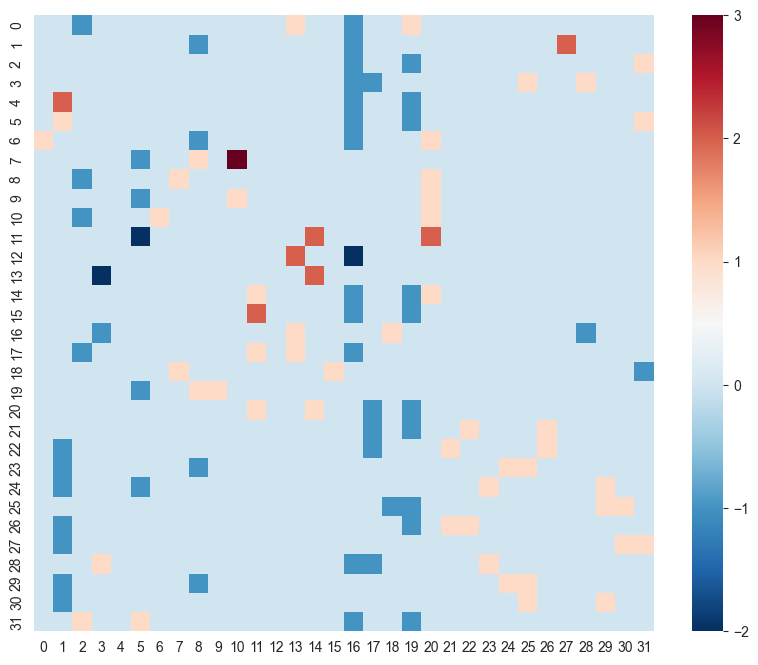

CPU times: user 3.53 s, sys: 178 ms, total: 3.7 s
Wall time: 6.12 s


In [23]:
%%time
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


In [9]:
%%time
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

CPU times: user 2.38 ms, sys: 499 µs, total: 2.88 ms
Wall time: 2.49 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super(

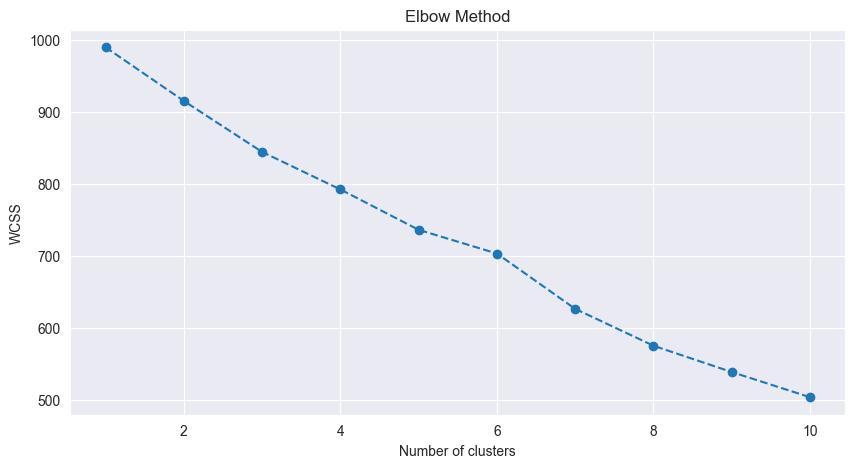

CPU times: user 4.02 s, sys: 414 ms, total: 4.43 s
Wall time: 5.8 s


In [10]:
%%time
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
%%time
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


CPU times: user 119 ms, sys: 15.5 ms, total: 134 ms
Wall time: 173 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
%%time


print(len(df))
print(len(clustered_students))


33
33
CPU times: user 4.03 ms, sys: 737 µs, total: 4.76 ms
Wall time: 1.21 ms


In [13]:
%%time

cluster_df = pd.DataFrame({'Cluster': clustered_students})

# Concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Check the result
print(df.head())

           Timestamp                 Email Address  \
0   5/6/2023 8:20:27       denywirantara@gmail.com   
1  5/5/2023 23:40:29           p78922929@gmail.com   
2  5/4/2023 21:40:14    dewaayukesya2812@gmail.com   
3  5/4/2023 17:44:14  baguspradanakusuma@gmail.com   
4  5/6/2023 21:40:05      madesuparta692@gmail.com   

                        NAMA LENGKAP  NO ABSEN KELAS  \
0      Anak Agung Gde Deny Wirantara         1  VIIE   
1                      Arsyavin Azmi         2  VIIE   
2  I Dewa Ayu Agung Kesya Widyantika         3  VIIE   
3        I Gede Bagus Pradana Kusuma         4  VIIE   
4               I Gede Surya Kencana         5  VIIE   

  1. Teman anda yang paling anda sukai di kelas  \
0                                 Arsyavin Azmi   
1                            I Made Gita Wedana   
2                 Ni Made Candra Maharani Putri   
3                      I Kadek Ari Sedana Putra   
4                            I Made Gita Wedana   

                               

In [14]:
# Drop duplicate values in the 'NAMA LENGKAP' column
df.drop_duplicates(subset='NAMA LENGKAP', keep='first', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the length after dropping duplicates
print(len(df))

# Cetak baris yang dihapus
removed_data = df[df.duplicated(subset='NAMA LENGKAP', keep='first')]
print(removed_data)

# Recreate DataFrame using unique values
unique_names_df = df.drop_duplicates(subset='NAMA LENGKAP', keep='first').copy()



33
Empty DataFrame
Columns: [Timestamp, Email Address, NAMA LENGKAP, NO ABSEN, KELAS, 1. Teman anda yang paling anda sukai di kelas, Alasan, 2. Teman anda yang paling anda sukai di kelas, ALASAN, 1. Teman anda yang paling anda tidak sukai di kelas, ALASAN.1, 2. Teman anda yang paling anda tidak sukai di kelas, ALASAN.2, Cluster]
Index: []


In [15]:
%%time
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

CPU times: user 317 µs, sys: 56 µs, total: 373 µs
Wall time: 365 µs


In [16]:
%%time
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


             Timestamp                    Email Address  \
1    5/5/2023 23:40:29              p78922929@gmail.com   
2    5/4/2023 21:40:14       dewaayukesya2812@gmail.com   
3    5/4/2023 17:44:14     baguspradanakusuma@gmail.com   
4    5/6/2023 21:40:05         madesuparta692@gmail.com   
5     5/7/2023 8:51:44     mahardikaraditya20@gmail.com   
6    5/4/2023 17:37:57             deangga931@gmail.com   
7   6/20/2023 11:51:58   nikomangsulastriasih@gmail.com   
8    5/6/2023 21:13:57           madegita0403@gmail.com   
9    5/4/2023 18:59:29         adityayudistra@gmail.com   
10    5/5/2023 8:23:15       anggaygyanggaygy@gmail.com   
11   5/4/2023 21:08:38         putuerlangga05@gmail.com   
12   5/7/2023 14:04:46          ratnadewi3762@gmail.com   
13   5/4/2023 19:56:48     iputuriskisetiawan@gmail.com   
14   5/5/2023 20:25:00        wawanjanuarta47@gmail.com   
15   5/4/2023 19:23:39  idabagusputuadnyana05@gmail.com   
16   5/5/2023 19:17:03        kadekadiputra68@gmail.com 

In [17]:
%%time
# Inisiasi graf berarah

G = nx.DiGraph()

CPU times: user 67 µs, sys: 49 µs, total: 116 µs
Wall time: 125 µs


In [18]:
%%time
# eTambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


CPU times: user 8.56 ms, sys: 656 µs, total: 9.22 ms
Wall time: 19.4 ms


In [19]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


CPU times: user 16.9 ms, sys: 742 µs, total: 17.7 ms
Wall time: 27.5 ms


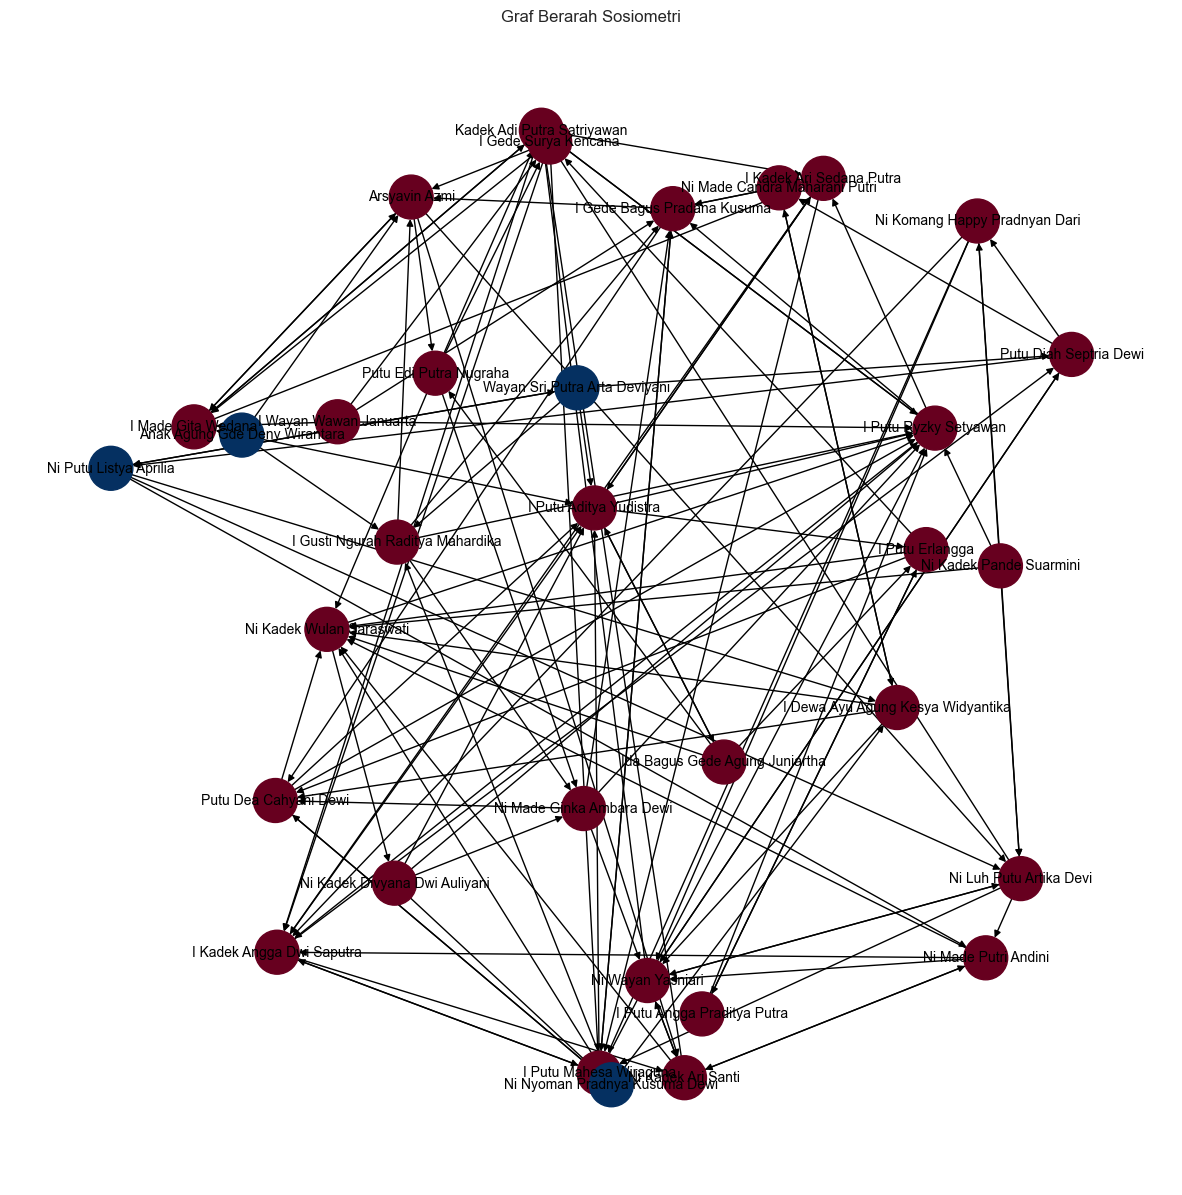

CPU times: user 4.83 s, sys: 291 ms, total: 5.12 s
Wall time: 13.3 s


In [20]:
%%time
# Visualisasi graf berarah

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000)

ax.set_title('Graf Berarah Sosiometri')
plt.show()

In [21]:
%%time
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


CPU times: user 641 µs, sys: 43 µs, total: 684 µs
Wall time: 8.91 ms


In [22]:
%%time
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


CPU times: user 7.11 ms, sys: 939 µs, total: 8.05 ms
Wall time: 7.53 ms


In [23]:
%%time
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
             Timestamp                   Email Address  \
8    5/6/2023 21:13:57          madegita0403@gmail.com   
28    5/6/2023 9:46:02            yasniari36@gmail.com   
1    5/5/2023 23:40:29             p78922929@gmail.com   
4    5/6/2023 21:40:05        madesuparta692@gmail.com   
7   6/20/2023 11:51:58  nikomangsulastriasih@gmail.com   

                NAMA LENGKAP  NO ABSEN KELAS  \
8         I Made Gita Wedana         9  VIIE   
28         Ni Wayan Yasniari        29  VIIE   
1              Arsyavin Azmi         2  VIIE   
4       I Gede Surya Kencana         5  VIIE   
7   I Kadek Ari Sedana Putra         8  VIIE   

   1. Teman anda yang paling anda sukai di kelas                       Alasan  \
8                                  Arsyavin Azmi       Di kasih pinjam pulpen   
28                       Ni Luh Putu Artika Devi                         Lucu   
1                             I Made Gita Wedana        Karena orang nya seru   
4

/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


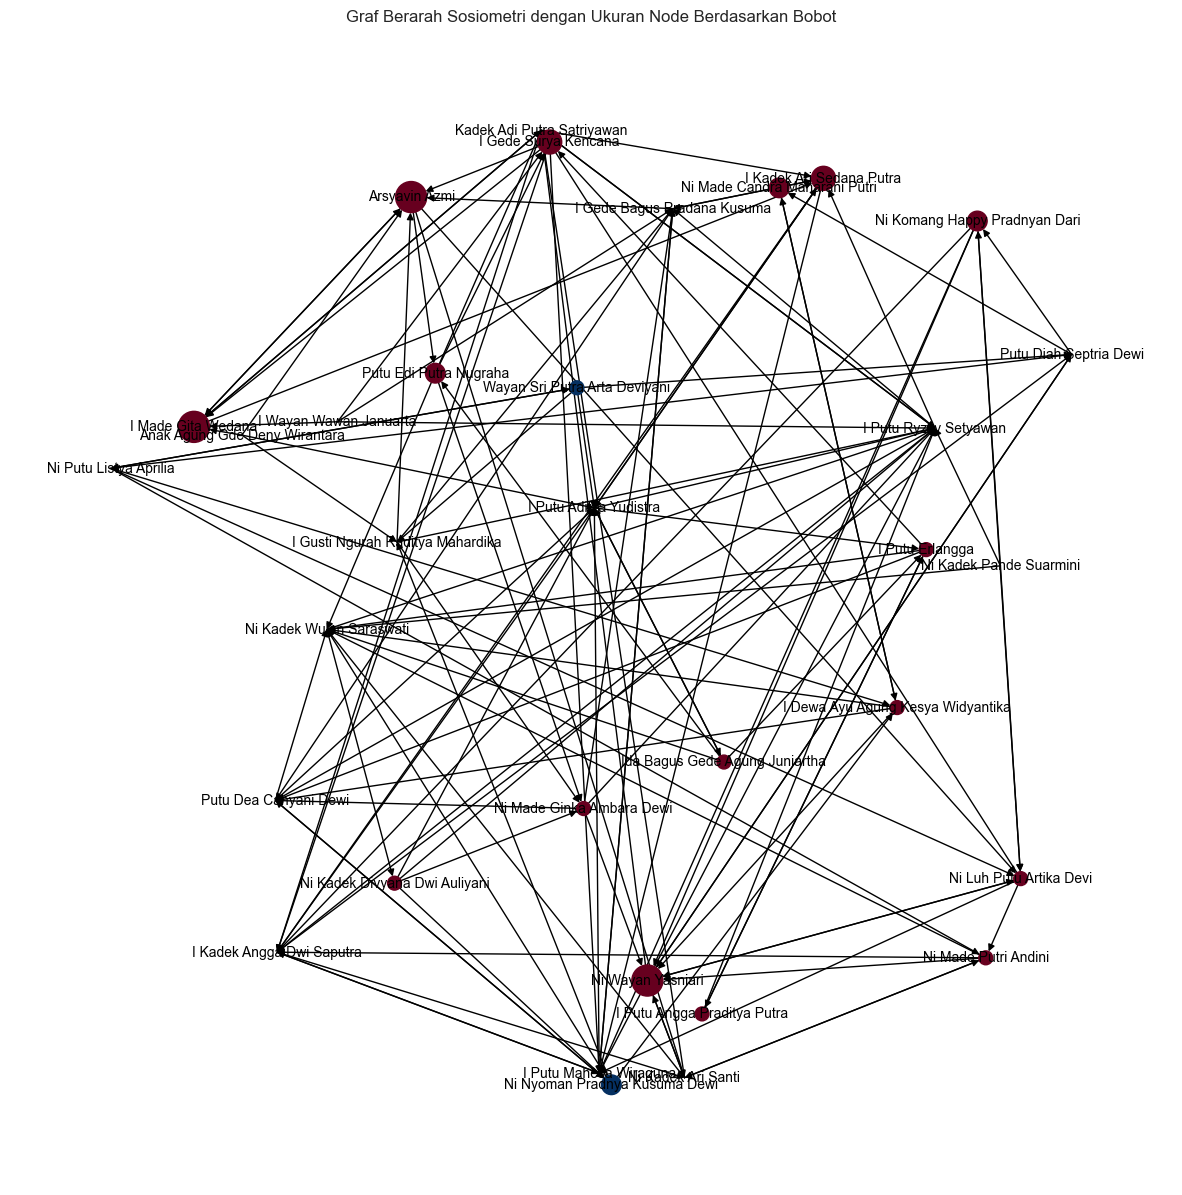

CPU times: user 3.81 s, sys: 196 ms, total: 4 s
Wall time: 5.93 s


In [24]:
%%time
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


In [25]:
%%time
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


CPU times: user 15 µs, sys: 4 µs, total: 19 µs
Wall time: 31 µs


In [26]:
%%time
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


CPU times: user 316 µs, sys: 2 µs, total: 318 µs
Wall time: 330 µs


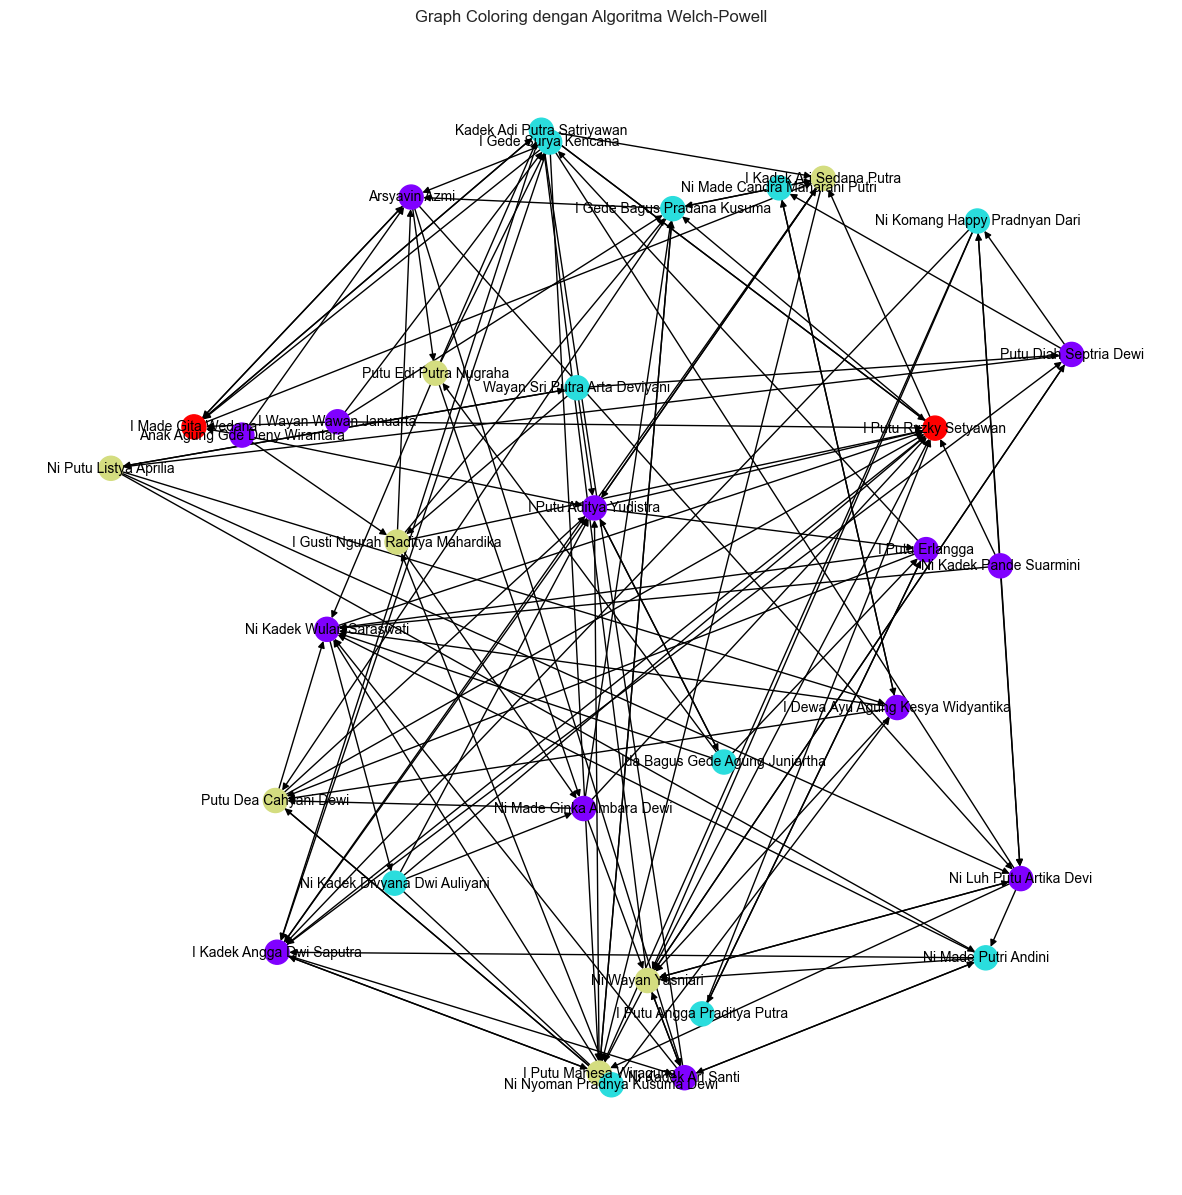

CPU times: user 4.93 s, sys: 276 ms, total: 5.2 s
Wall time: 12.2 s


In [27]:
%%time
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


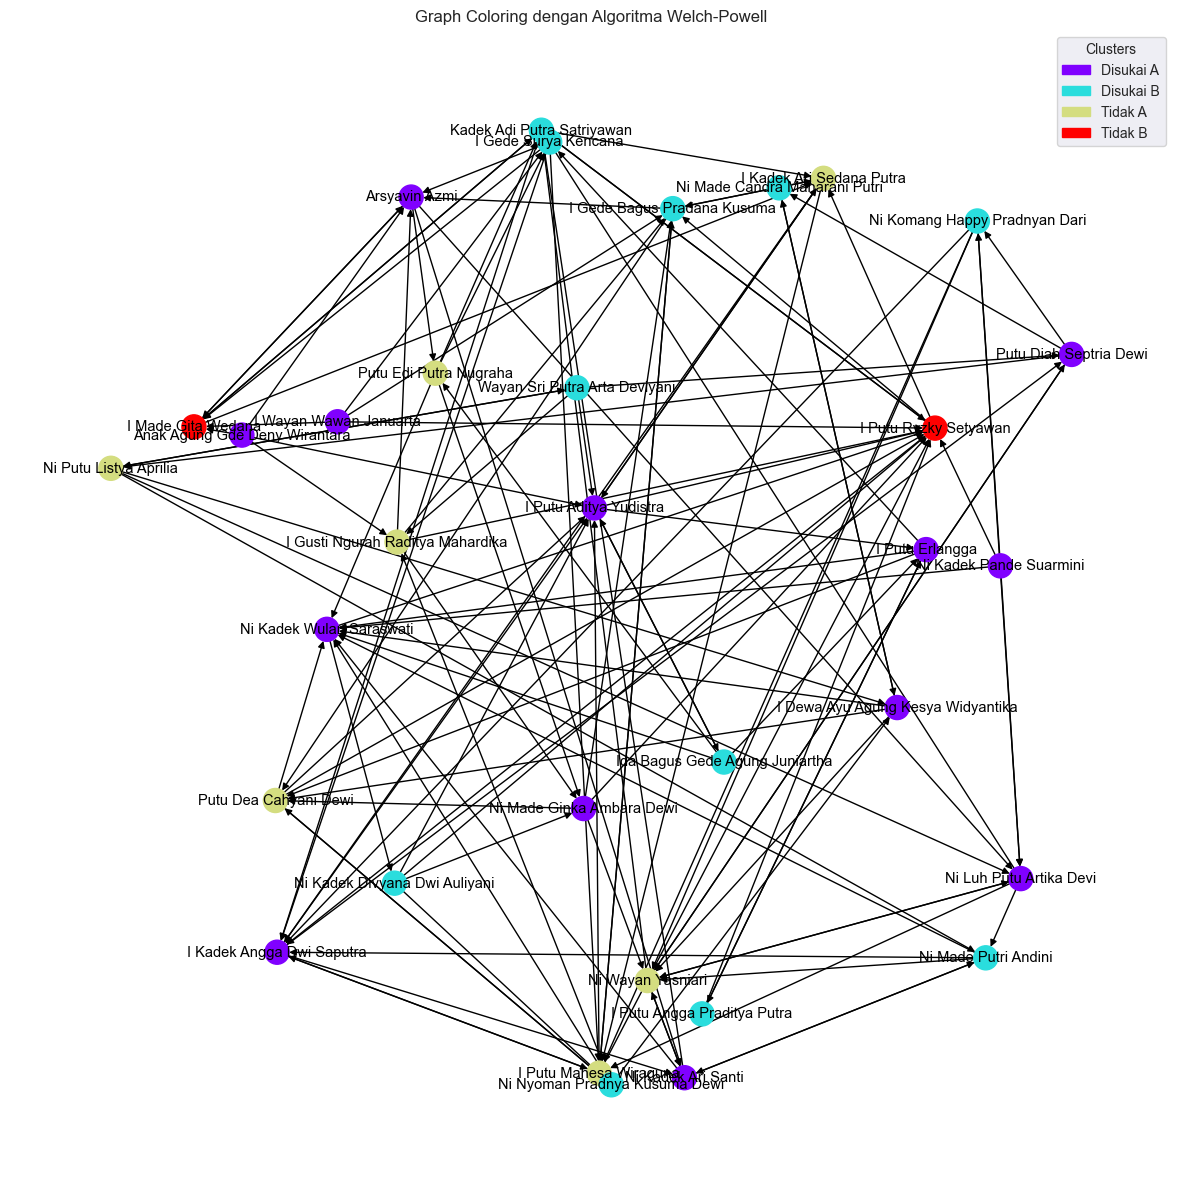

CPU times: user 9.96 s, sys: 460 ms, total: 10.4 s
Wall time: 22.9 s


In [28]:
%%time
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

ax.legend(handles=handles, title='Clusters')
plt.show()


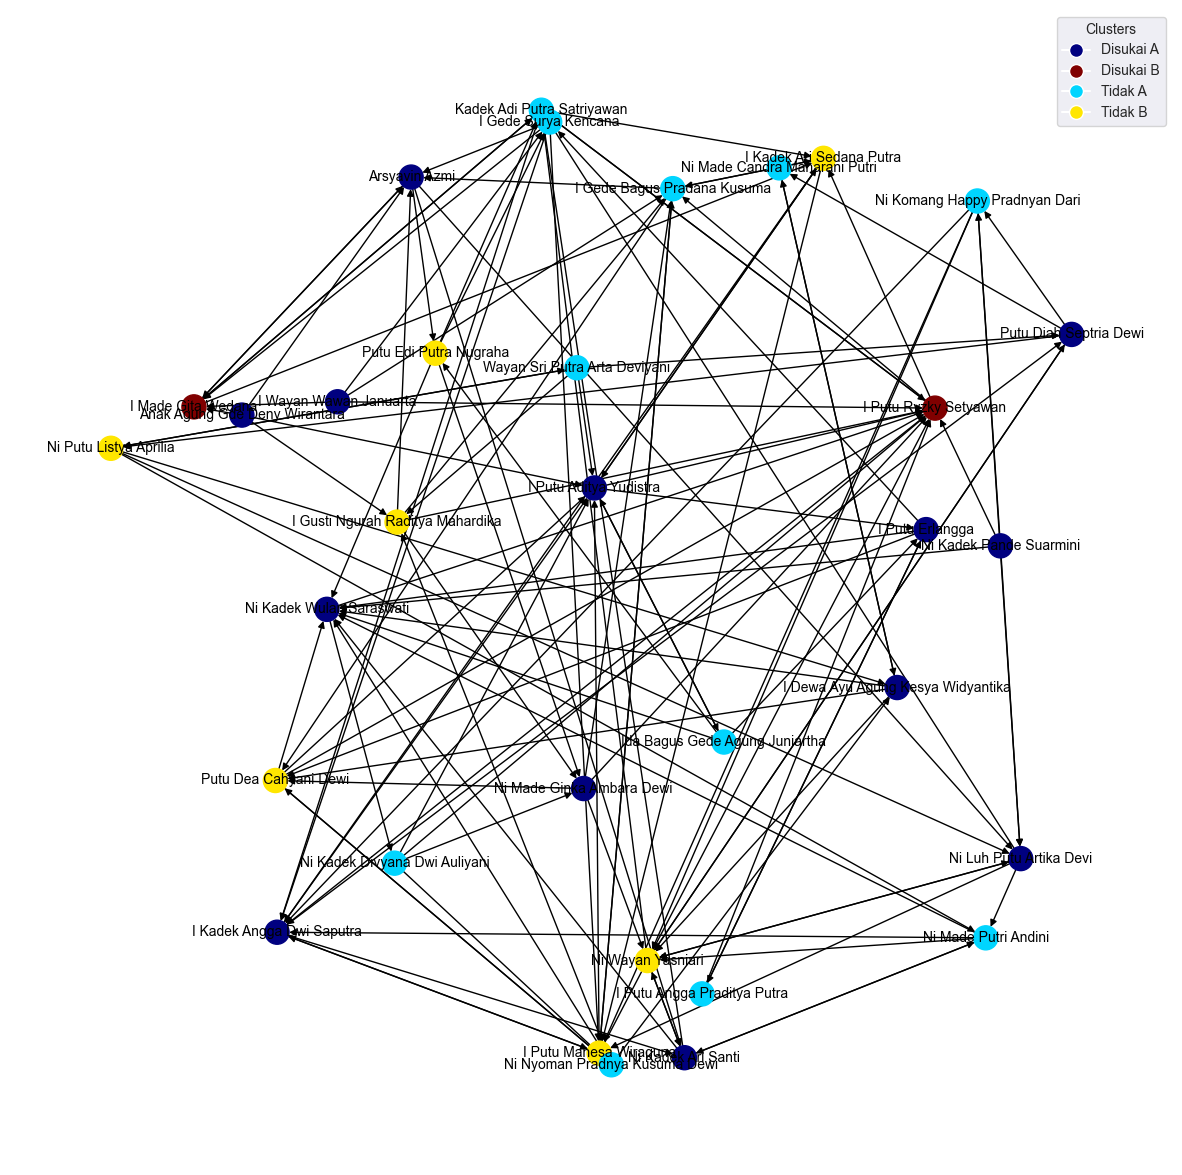

CPU times: user 9.51 s, sys: 433 ms, total: 9.94 s
Wall time: 18.1 s


In [29]:
%%time
# Ubah nilai numerik colors menjadi warna
cmap = plt.cm.jet  # Kita bisa mengganti jet dengan colormap lainnya yang Kita suka
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

# Gambar graf dengan warna yang sudah di-mapped
nx.draw(G, pos, with_labels=True, node_color=mapped_colors, font_size=10, ax=ax)

# Buat legenda yang dinamis
unique_colors = list(set(mapped_colors))
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[color_group],
                      markersize=10,
                      markerfacecolor=color) for color_group, color in zip(set(colors),
                                                                           unique_colors)]

ax.legend(handles=handles, title="Clusters")

plt.show()

In [30]:
file_path = "./sociometryclustering/Processed Data E.csv"
df = pd.read_csv(file_path)
df

,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/6/2023 8:20:27,denywirantara@gmail.com,Anak Agung Gde Deny Wirantara,1,VIIE,Arsyavin Azmi,Baik ramah dan sopan,I Made Gita Wedana,Baik ramah suka bercanda dan sopan,I Gusti Ngurah Raditya Mahardika,Krana sering membuly,I Putu Aditya Yudistra,Karena sering membuly
1,5/5/2023 23:40:29,p78922929@gmail.com,Arsyavin Azmi,2,VIIE,I Made Gita Wedana,Karena orang nya seru,Putu Edi Putra Nugraha,Bisa di ajak bercanda dan asik orang nya,Ni Kadek Ari Santi,"Sering mengambil barang tiba""",Ni Luh Putu Artika Devi,"Suka menendang"" bangku tidak jelas"
2,5/4/2023 21:40:14,dewaayukesya2812@gmail.com,I Dewa Ayu Agung Kesya Widyantika,3,VIIE,Ni Made Candra Maharani Putri,"baik, suka berbagi, suka menolong saat saya ke...",Ni Wayan Yasniari,"baik, suka bercerita, suka menolong, dan asik ...",Ni Kadek Wulan Saraswati,"tidak suka dengan cara bicaranya, dan suka men...",Putu Dea Cahyani Dewi,mencari pada saat diperlunya saja
3,5/4/2023 17:44:14,baguspradanakusuma@gmail.com,I Gede Bagus Pradana Kusuma,4,VIIE,I Kadek Ari Sedana Putra,Tidak mengejek,Arsyavin Azmi,Asik di ajak ketawa,Putu Dea Cahyani Dewi,Suka mukul,I Putu Mahesa Wiraguna,Mengejek orang tua
4,5/6/2023 21:40:05,madesuparta692@gmail.com,I Gede Surya Kencana,5,VIIE,I Made Gita Wedana,Karena Baik dan tidak jahil,Arsyavin Azmi,Karena seru di ajak bicara,I Kadek Angga Dwi Saputra,Karena sering mengejek dan mengganggu,I Putu Mahesa Wiraguna,Karena Sering mengejek dan mengganggu
5,5/7/2023 8:51:44,mahardikaraditya20@gmail.com,I Gusti Ngurah Raditya Mahardika,6,VIIE,Ni Made Ginka Ambara Dewi,Karena dia suka bercanda dan lucu lah,Arsyavin Azmi,Dia bisa bikin saya ketawa dan suka saling cer...,I Gede Bagus Pradana Kusuma,Karena dia suka memukul saya dan mengejek tan...,I Putu Ryzky Setyawan,Dia \nsuka membully
6,5/4/2023 17:37:57,deangga931@gmail.com,I Kadek Angga Dwi Saputra,7,VIIE,I Putu Mahesa Wiraguna,Karena asik di ajk bercanda,I Putu Aditya Yudistra,Karena asik dan seru,Ni Kadek Ari Santi,Karena baperan,Putu Diah Septria Dewi,Karena tidak bisa di ajk bercanda
7,6/20/2023 11:51:58,nikomangsulastriasih@gmail.com,I Kadek Ari Sedana Putra,8,VIIE,I Putu Aditya Yudistra,karena baik,I Gede Bagus Pradana Kusuma,karena baik,I Kadek Angga Dwi Saputra,karena sering membully,I Putu Mahesa Wiraguna,karena sering membully
8,5/6/2023 21:13:57,madegita0403@gmail.com,I Made Gita Wedana,9,VIIE,Arsyavin Azmi,Di kasih pinjam pulpen,Kadek Adi Putra Satriyawan,Di kasi pinjam buku LKS,I Kadek Ari Sedana Putra,Suka mengejek nama orang tua,I Kadek Ari Sedana Putra,Marah saat tidak di beri nyontek tugas
9,5/4/2023 18:59:29,adityayudistra@gmail.com,I Putu Aditya Yudistra,10,VIIE,I Kadek Ari Sedana Putra,Karena dia ganteng banget🥶🥶🥶,Ida Bagus Gede Agung Juniartha,Karenaa dia baik,I Putu Ryzky Setyawan,Karena dia suka mengejek nama ortu,I Putu Erlangga,Karena dia suka mengejek nama ortu


In [31]:
# Gabungkan kolom teman yang disukai dan tidak disukai menjadi satu DataFrame baru
df_teman_sukai = pd.concat([df['1. Teman anda yang paling anda sukai di kelas'], df['2. Teman anda yang paling anda sukai di kelas']],ignore_index=True).dropna()

df_teman_tidak_sukai = pd.concat([df['1. Teman anda yang paling anda tidak sukai di kelas'], df['2. Teman anda yang paling anda tidak sukai di kelas']],ignore_index=True).dropna()

# Bersihkan dan normalisasi data
df_teman_y = df_teman_sukai.str.strip()
df_teman_x = df_teman_tidak_sukai.str.strip()

# Ganti NaN dengan string kosong ('') sebelum menghitung frekuensi
df_teman_y = df_teman_y.fillna('')
df_teman_x = df_teman_x.fillna('')

# Hitung frekuensi kemunculan teman yang disukai dan tidak disukai
frekuensi_disukai = df_teman_y.value_counts().astype(float)
frekuensi_tidak_disukai = df_teman_x.value_counts().astype(float)

# Buat DataFrame kesimpulan
df_kesimpulan = pd.merge(pd.DataFrame({'Nama siswa/i yang disukai': frekuensi_disukai.index,
                                       'Frekuensi disukai': frekuensi_disukai.values}),
                         pd.DataFrame({'Nama siswa/i yang tidak disukai': frekuensi_tidak_disukai.index,
                                       'Frekuensi tidak disukai': frekuensi_tidak_disukai.values}),
                         how='outer',
                         left_index=True,
                         right_index=True)

# Tampilkan DataFrame kesimpulan
df_kesimpulan

,Nama siswa/i yang disukai,Frekuensi disukai,Nama siswa/i yang tidak disukai,Frekuensi tidak disukai
0,Ni Wayan Yasniari,6.0,I Putu Ryzky Setyawan,13.0
1,Arsyavin Azmi,5.0,Ni Kadek Wulan Saraswati,8.0
2,I Made Gita Wedana,5.0,I Kadek Angga Dwi Saputra,6.0
3,I Dewa Ayu Agung Kesya Widyantika,4.0,I Putu Mahesa Wiraguna,5.0
4,I Kadek Ari Sedana Putra,4.0,I Putu Aditya Yudistra,5.0
5,I Putu Aditya Yudistra,3.0,Kadek Adi Putra Satriyawan,4.0
6,I Putu Erlangga,3.0,I Gede Bagus Pradana Kusuma,4.0
7,I Gede Surya Kencana,3.0,I Gusti Ngurah Raditya Mahardika,3.0
8,Ni Luh Putu Artika Devi,3.0,Putu Dea Cahyani Dewi,3.0
9,Ni Made Ginka Ambara Dewi,2.0,I Kadek Ari Sedana Putra,2.0
